<center>
    <div style="display: flex; justify-content: center; align-items: center; gap: 20px;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/%C3%89cole_polytechnique_signature.svg/langfr-180px-%C3%89cole_polytechnique_signature.svg.png" width="180" height="100">
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlxFPutq25RUGhh9DJ86P4NwdGybSDyGAmgQ&s" width="150" height="100">
        <img src="https://media.licdn.com/dms/image/v2/D4D0BAQEwDUCG0eQoBA/company-logo_200_200/company-logo_200_200/0/1697033924771/taltech_school_of_business_and_governance_logo?e=2147483647&v=beta&t=7aWbhqfsIGlDeSRzuaDzszlXMciCw-F9dUl4JvDhL8U" width="150" height="100">
    </div>
    <br>
  <center> <font color=#023F7C size=4>Econophysics, Fall 2024</font> <br></center>
  <center><font color='#023F7C' size="6.5">Generation of Random Graphs: Applications in Financial
Networks </font> <br></center>


</center>

<font color="#023F7C">**Author**:</font> 
- **Christel Astride Mallo Poundi**, Second year student at Ecole Polytechnique <br>

# **I. Random Graph Generation Models**  Report Section : pages 2-11

**The Erdős–Rényi (ER) model**

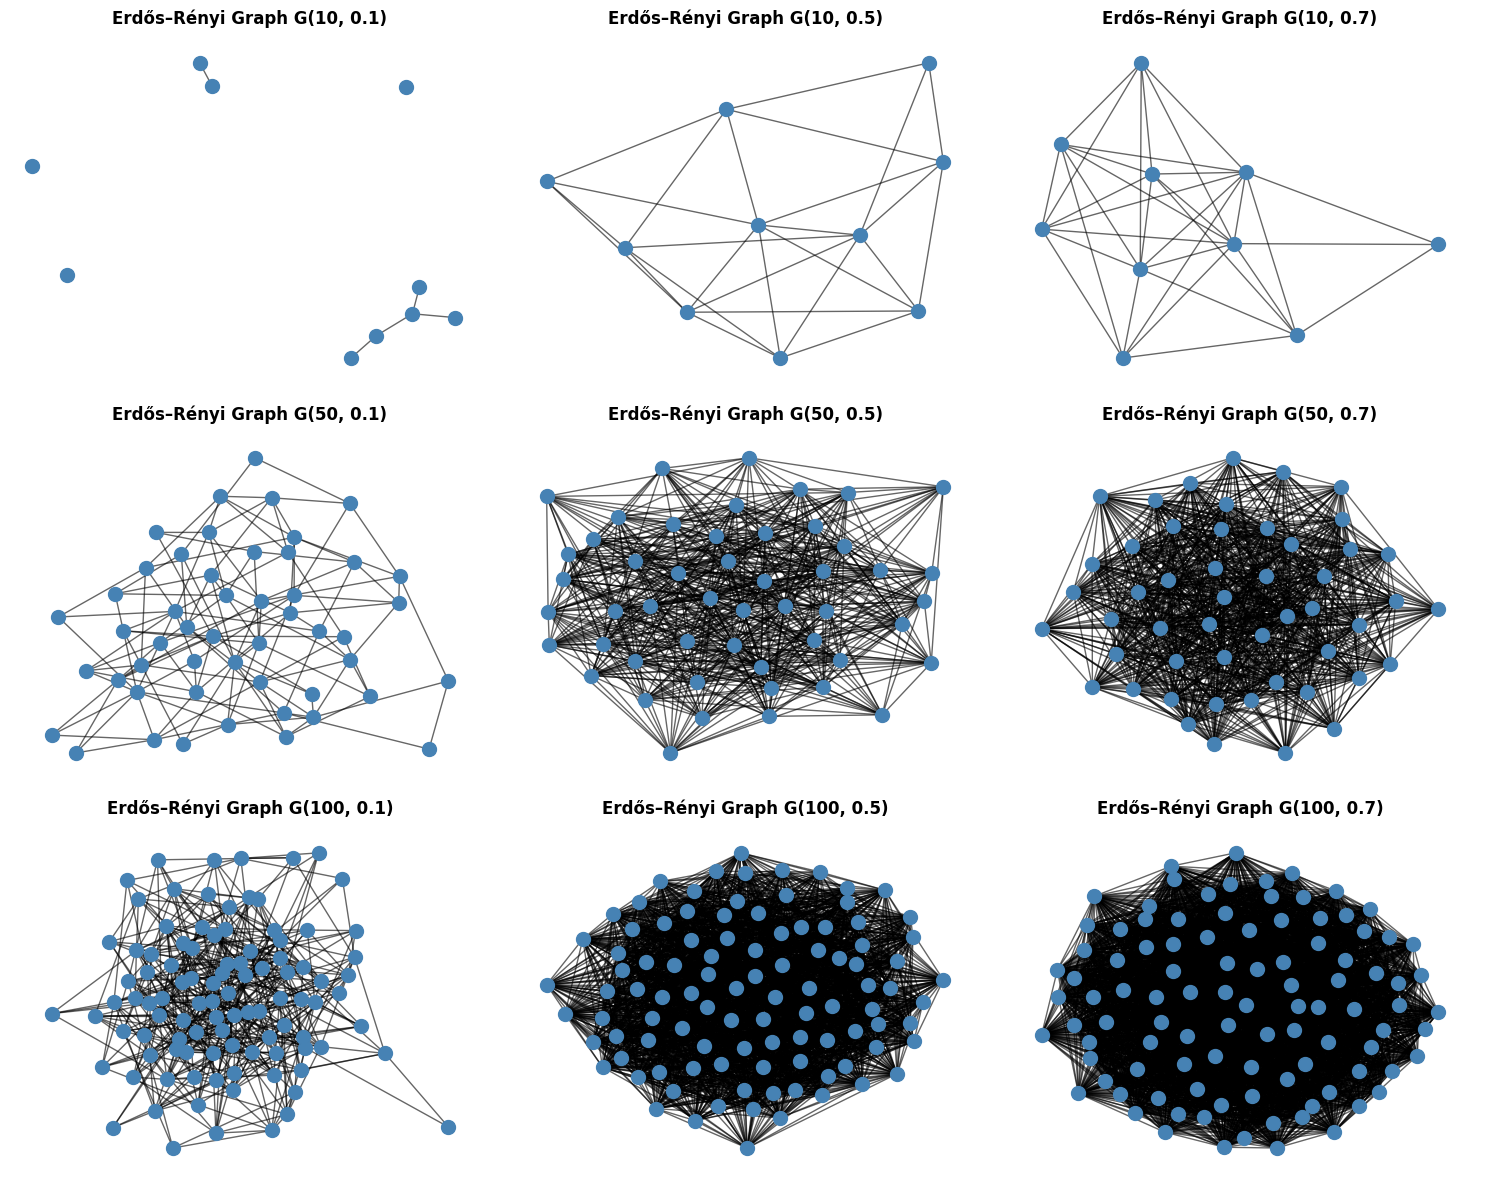

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Paramètres des graphes
N = np.array([10, 50, 100])
P = np.array([0.1, 0.5, 0.7])

# Création de la figure avec des sous-graphiques
fig, axs = plt.subplots(len(N), len(P), figsize=(15, 12))
fig.patch.set_facecolor('white')  # fond blanc

for i, n in enumerate(N):
    for j, p in enumerate(P):
        G = nx.erdos_renyi_graph(n, p)
        
        ax = axs[i, j]
        ax.set_facecolor('white')  # fond blanc des sous-graphes
        ax.axis('off')  # suppression des axes
        
        # Positionnement des noeuds avec un layout plus clair
        pos = nx.spring_layout(G, seed=42)  # mise en page stable et lisible
        
        # Dessin du graphe
        nx.draw_networkx_nodes(G, pos, node_size=100, node_color='steelblue', ax=ax)
        nx.draw_networkx_edges(G, pos, alpha=0.6, ax=ax)
        
        # Titre avec format rigoureux
        ax.set_title(f"Erdős–Rényi Graph G({n}, {p:.1f})", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


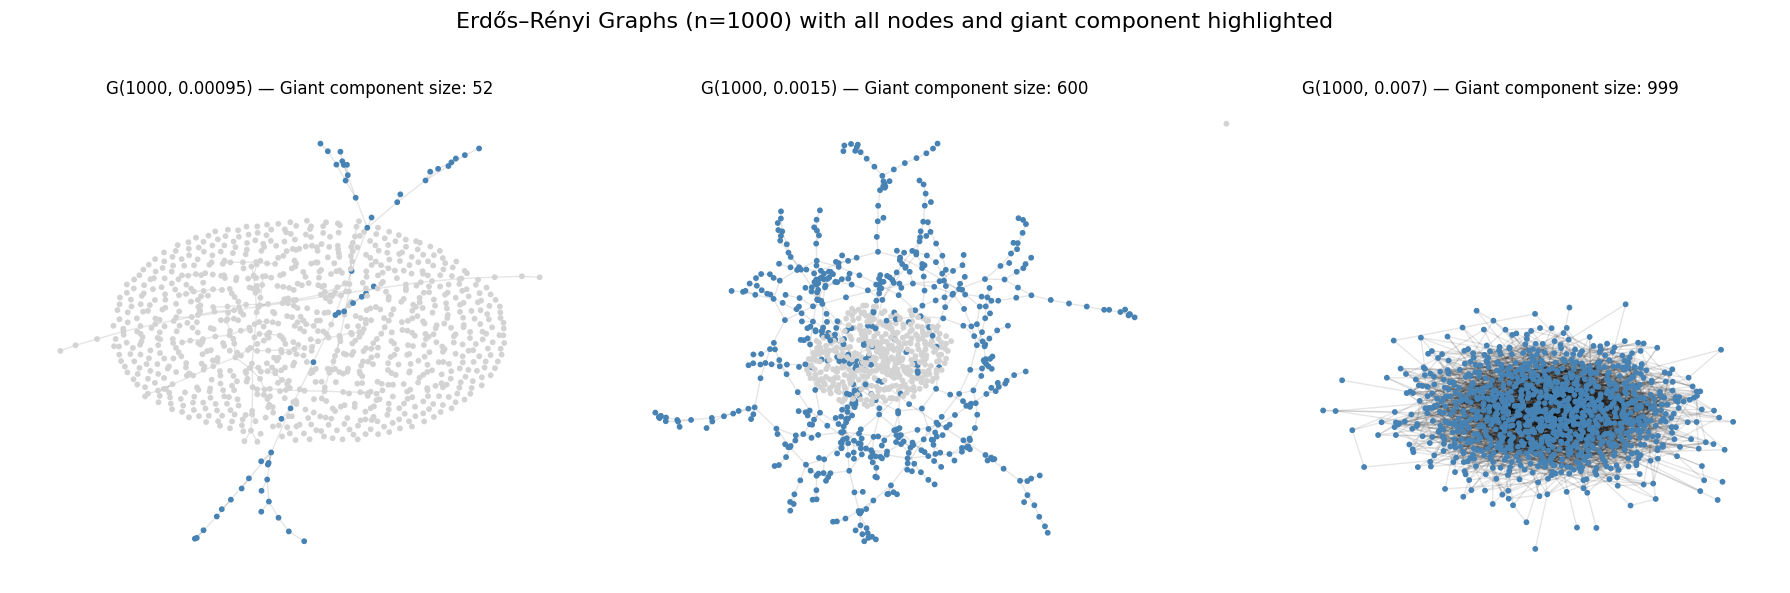

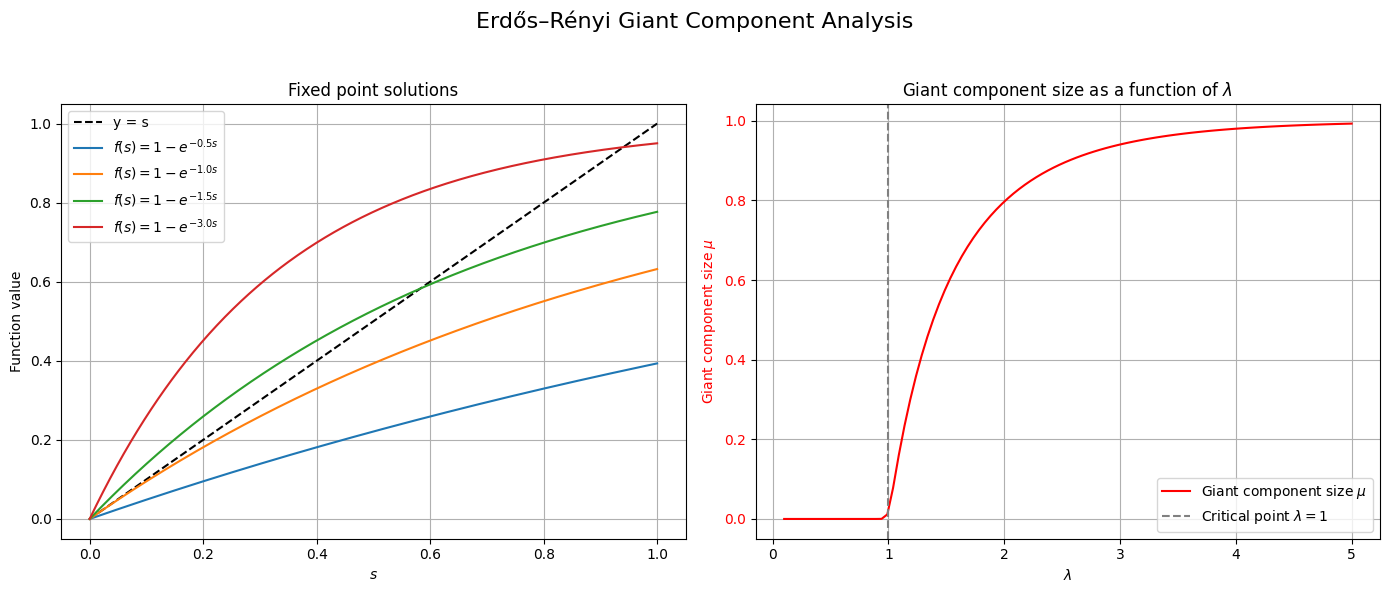

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to get nodes in giant component
def giant_component_nodes(G):
    giant_cc = max(nx.connected_components(G), key=len)
    return set(giant_cc)

n = 1000
ps = [0.00095, 0.0015, 0.007]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, p in enumerate(ps):
    G = nx.erdos_renyi_graph(n, p, seed=42)
    pos = nx.spring_layout(G, seed=42)
    giant_nodes = giant_component_nodes(G)
    
    ax = axs[i]
    # Draw all nodes, color depends on whether in giant component
    node_colors = ['steelblue' if node in giant_nodes else 'lightgray' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color=node_colors, ax=ax)
    nx.draw_networkx_edges(G, pos, alpha=0.1, ax=ax)
    
    ax.set_title(f"G({n}, {p}) — Giant component size: {len(giant_nodes)}")
    ax.axis('off')

plt.suptitle("Erdős–Rényi Graphs (n=1000) with all nodes and giant component highlighted", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Second figure: two subplots

def f(s, lambd):
    return 1 - np.exp(-lambd * s)

def solve_mu(lambd):
    mu = 0.5
    for _ in range(100):
        mu_new = 1 - np.exp(-lambd * mu)
        if abs(mu_new - mu) < 1e-6:
            break
        mu = mu_new
    return mu

s = np.linspace(0, 1, 500)
lambdas = np.linspace(0.1, 5, 100)
mus = np.array([solve_mu(l) for l in lambdas])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left subplot: plot y=s and f(s) for different lambdas
ax1.plot(s, s, label='y = s', color='black', linestyle='--')
for lambd in [0.5, 1.0, 1.5, 3.0]:
    ax1.plot(s, f(s, lambd), label=f'$f(s) = 1 - e^{{-{lambd} s}}$')
ax1.set_xlabel('$s$')
ax1.set_ylabel('Function value')
ax1.set_title('Fixed point solutions')
ax1.legend()
ax1.grid(True)

# Right subplot: plot giant component size μ vs λ
ax2.plot(lambdas, mus, 'r-', label='Giant component size $\\mu$')
ax2.axvline(x=1, color='gray', linestyle='--', label='Critical point $\\lambda=1$')
ax2.set_xlabel('$\\lambda$')
ax2.set_ylabel('Giant component size $\\mu$', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_title('Giant component size as a function of $\\lambda$')
ax2.legend()
ax2.grid(True)

plt.suptitle("Erdős–Rényi Giant Component Analysis", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**The Barabási-Albert (BA) model**

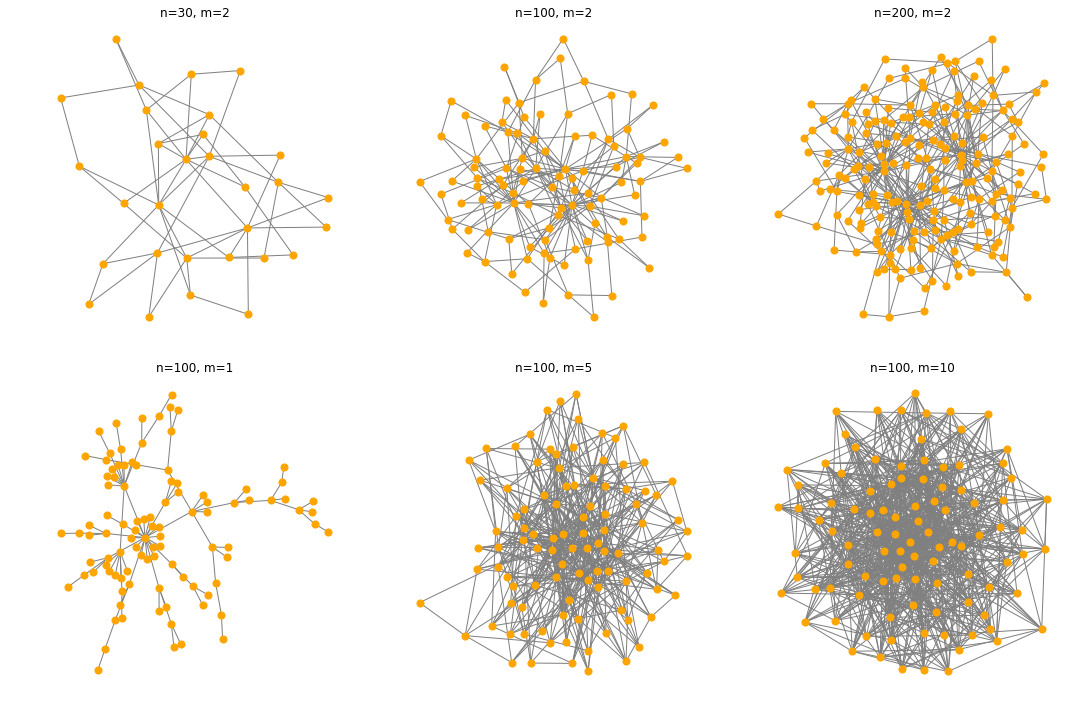

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate and visualize a BA graph
def plot_ba_graph(n, m, ax, title):
    ba_graph = nx.barabasi_albert_graph(n, m)
    pos = nx.spring_layout(ba_graph, seed=42)
    nx.draw(
        ba_graph, pos, ax=ax, with_labels=False, node_size=50, node_color="orange", edge_color="gray"
    )
    ax.set_title(title)

# Comparison of graphs for different parameters
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Variation of n
plot_ba_graph(30, 2, axs[0, 0], "n=30, m=2")
plot_ba_graph(100, 2, axs[0, 1], "n=100, m=2")
plot_ba_graph(200, 2, axs[0, 2], "n=200, m=2")

# Variation of m
plot_ba_graph(100, 1, axs[1, 0], "n=100, m=1")
plot_ba_graph(100, 5, axs[1, 1], "n=100, m=5")
plot_ba_graph(100, 10, axs[1, 2], "n=100, m=10")

plt.tight_layout()
plt.show()



 **The Watts-Strogatz (WS) model**

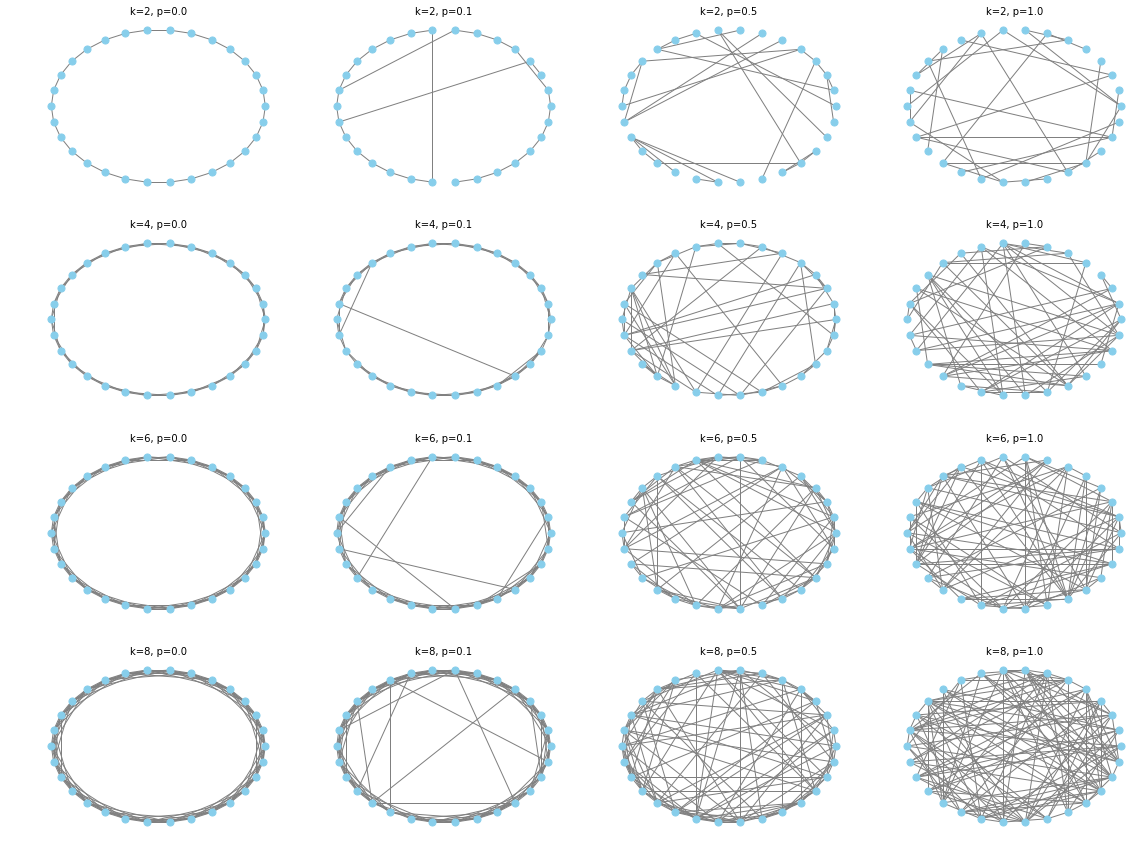

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# Parameters for WS graphs
n = 30  # Number of nodes
k_values = [2, 4, 6, 8]  # Number of neighbors per node
p_values = [0.0, 0.1, 0.5, 1.0]  # Rewiring probabilities

# Create subplots
fig, axes = plt.subplots(len(k_values), len(p_values), figsize=(16, 12))

for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        # Generate the WS graph
        ws_graph = nx.watts_strogatz_graph(n, k, p)

        # Position nodes for a circular layout
        pos = nx.circular_layout(ws_graph)

        # Draw the graph in the corresponding subplot
        ax = axes[i, j]
        ax.set_title(f"k={k}, p={p}", fontsize=10)
        nx.draw(
            ws_graph, pos, ax=ax, node_size=50, node_color="skyblue", edge_color="gray"
        )

        # Remove axes
        ax.axis("off")

# Adjust spaces between subplots
plt.tight_layout()
plt.show()


# II.**Visualization of Asset Correlations** report section : pages 12 - 15 

**Loading Real Data and complete correlation graph**

Correlation matrix 

      GOOG  TSLA   PX1  MSFT   DAX  .INX  AMZN   JPM   VTI
GOOG  1.00  0.34  0.14  0.52  0.33  0.61  0.62  0.15  0.58
TSLA  0.34  1.00  0.30  0.32  0.41  0.56  0.38  0.31  0.57
PX1   0.14  0.30  1.00  0.11  0.69  0.47  0.21  0.39  0.48
MSFT  0.52  0.32  0.11  1.00  0.34  0.61  0.58  0.09  0.57
DAX   0.33  0.41  0.69  0.34  1.00  0.69  0.43  0.41  0.70
.INX  0.61  0.56  0.47  0.61  0.69  1.00  0.62  0.56  0.99
AMZN  0.62  0.38  0.21  0.58  0.43  0.62  1.00  0.15  0.61
JPM   0.15  0.31  0.39  0.09  0.41  0.56  0.15  1.00  0.57
VTI   0.58  0.57  0.48  0.57  0.70  0.99  0.61  0.57  1.00


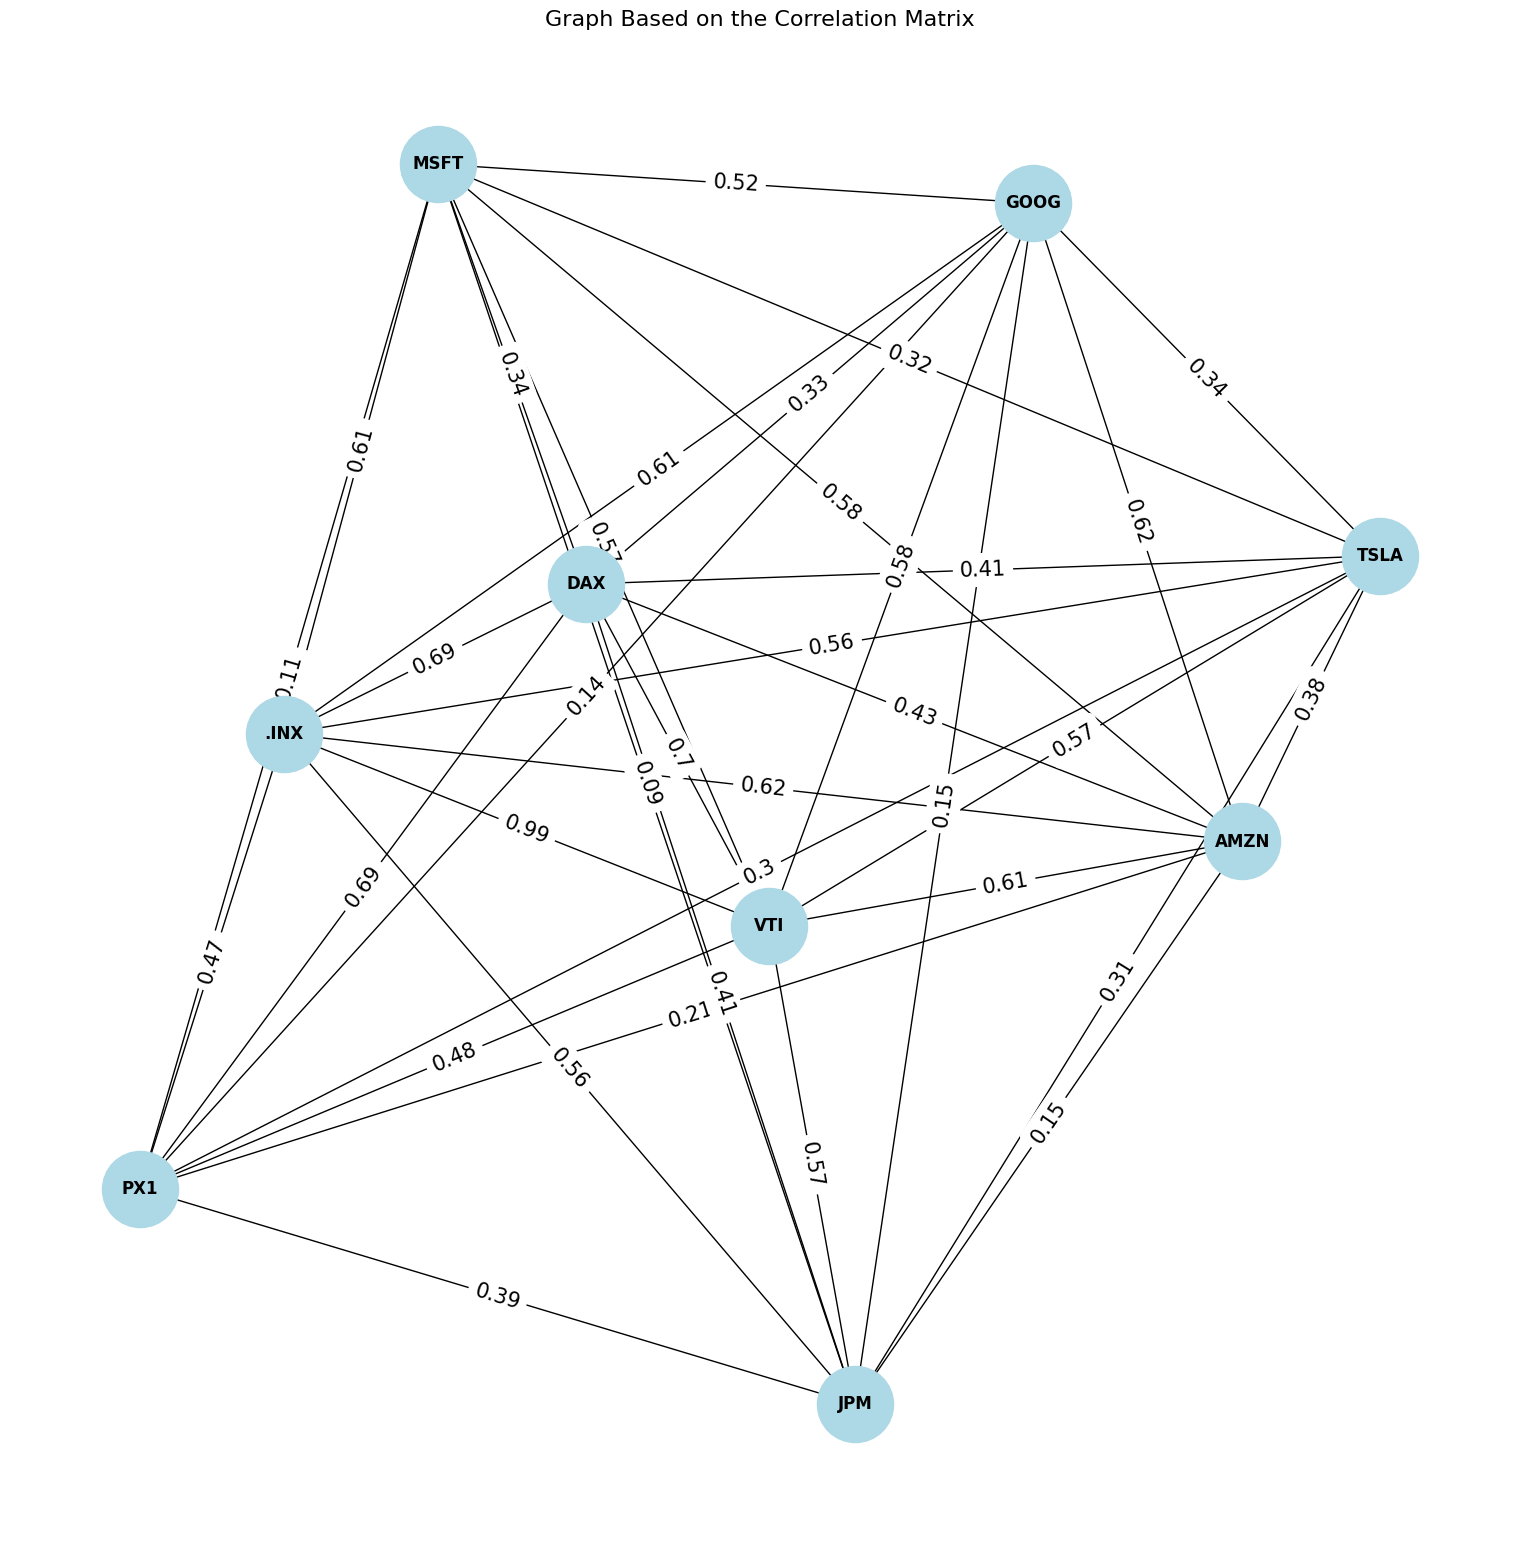

In [2]:
import pandas as pd

# Load the CSV file
file_path = 'data_indice.xlsx'  
df = pd.read_excel(file_path)

# Calculate the correlation matrix
correlation_matrix = df.corr().round(2)

# Display the correlation matrix
print(f"Correlation matrix \n\n{correlation_matrix}")

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# Create an empty graph
G = nx.Graph()

# Add nodes to the graph based on the indices of the correlation matrix
for col in correlation_matrix.columns:
    G.add_node(col)  # Add a node with the column name (the index)

# Add edges between nodes i and j, with weights proportional to A[i, j]
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Only loop through the upper half of the matrix (no duplicates)
        weight = correlation_matrix.iloc[i, j]
        if weight > 0:  # If the correlation is positive
            # Add an edge between the nodes corresponding to indices i and j
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j], weight=weight)

# Visualize the graph
plt.figure(figsize=(15, 15))  # Increase the figure size for more space

# Layout of nodes (spring_layout for a nice layout)
# Adjust the parameters of `spring_layout` for more space
pos = nx.spring_layout(G, seed=42, k=0.9, iterations=50)  # k = 0.5 for more spacing, iterations for more precision

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold')

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15)

# Add a title
plt.title("Graph Based on the Correlation Matrix", fontsize=16)

# Show the graph
plt.show()


**We will set a correlation threshold limit**

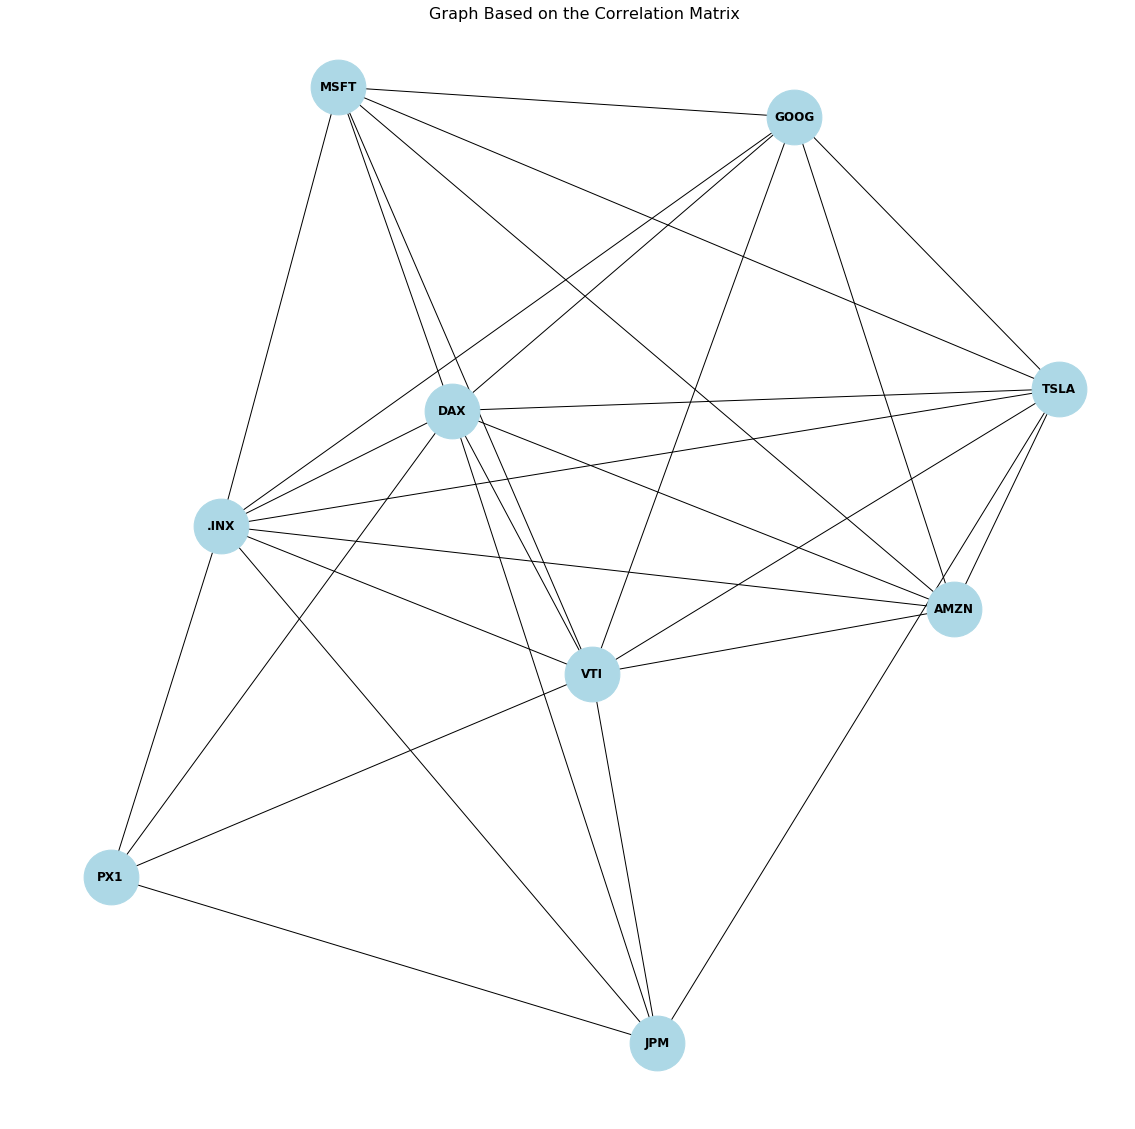

In [30]:

seuil = 0.3

# Create an empty graph
G_reel = nx.Graph()

# Add nodes to the graph based on the indices of the correlation matrix
for col in correlation_matrix.columns:
    G_reel.add_node(col)  # Add a node with the column name (the index)

# Add edges between nodes i and j, with weights proportional to A[i, j]
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Only loop through the upper half of the matrix (no duplicates)
        weight = correlation_matrix.iloc[i, j]
        if weight > seuil:  # If the correlation is positive (or any other condition)
            # Add an edge between the nodes corresponding to indices i and j
            G_reel.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

# Visualize the graph
plt.figure(figsize=(15, 15))  # Increase the figure size for more space

# Layout of nodes (spring_layout for a nice layout)
# Adjust the parameters of `spring_layout` for more space
pos = nx.spring_layout(G, seed=42, k=0.9, iterations=50)  # k = 0.5 for more spacing, iterations for more precision

# Draw the graph
nx.draw(G_reel, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold')

# Draw edge labels (weights)
#nx.draw_networkx_edge_labels(G, pos, font_size=15)

# Add a title
plt.title("Graph Based on the Correlation Matrix", fontsize=16)

# Show the graph
plt.show()


**Characteristics of the Real Graph**

In [31]:
G = G_reel
# 1. Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# 2. Average degree
avg_degree = sum(dict(G.degree()).values()) / num_nodes

# 3. Average clustering coefficient
avg_clustering = nx.average_clustering(G)

# 4. Average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(G)

# 5. Degree distribution exponent (Power-law approximation)
degree_sequence = [G.degree(n) for n in G.nodes()]
hist, bin_edges = np.histogram(degree_sequence, bins=range(max(degree_sequence)+2), density=True)
deg = (bin_edges[:-1] + bin_edges[1:]) / 2
log_deg = np.log(deg[deg > 0])
log_hist = np.log(hist[deg > 0])

# 6. Giant component (if it exists)
largest_component = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_component)
size_of_largest_component = len(largest_component)

# 7. Connectivity (Graph connectedness)
is_connected = nx.is_connected(G)

# Display results
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Average clustering coefficient: {avg_clustering:.2f}")
print(f"Average shortest path length: {avg_shortest_path_length:.2f}")
print(f"Size of the largest component: {size_of_largest_component}")
print(f"Is the graph connected? {is_connected}")


Number of nodes: 9
Number of edges: 29
Average degree: 6.44
Average clustering coefficient: 0.89
Average shortest path length: 1.19
Size of the largest component: 9
Is the graph connected? True


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


**New Correlation Matrix**

In [33]:
correlation_matrix = correlation_matrix.apply(
    lambda col: col.apply(lambda x : 1 if abs(x) >= seuil else 0))
print(correlation_matrix)

      GOOG  TSLA  PX1  MSFT  DAX  .INX  AMZN  JPM  VTI
GOOG     1     1    0     1    1     1     1    0    1
TSLA     1     1    1     1    1     1     1    1    1
PX1      0     1    1     0    1     1     0    1    1
MSFT     1     1    0     1    1     1     1    0    1
DAX      1     1    1     1    1     1     1    1    1
.INX     1     1    1     1    1     1     1    1    1
AMZN     1     1    0     1    1     1     1    0    1
JPM      0     1    1     0    1     1     0    1    1
VTI      1     1    1     1    1     1     1    1    1


**Comparison with Possible Models:**

- ER Model:
  Estimation of the Probability

In [34]:
estimate_p = 0
A = 0
n = len(correlation_matrix.columns)
df = pd.DataFrame(correlation_matrix, index=['GOOG', 'TSLA', 'PX1', 'MSFT', 'DAX', '.INX', 'AMZN', 'JPM', 'VTI'])

for i in range(n):
    for j in range(i + 1, n):  # We only iterate through the upper half of the matrix (no duplicates)
        if df.iloc[i, j] == 1:
            A += 1

estimate_p = 2 * A / (len(correlation_matrix.columns) * (len(correlation_matrix.columns) - 1))
print(f"The estimated value of p is {estimate_p}")


The estimated value of p is 0.8333333333333334


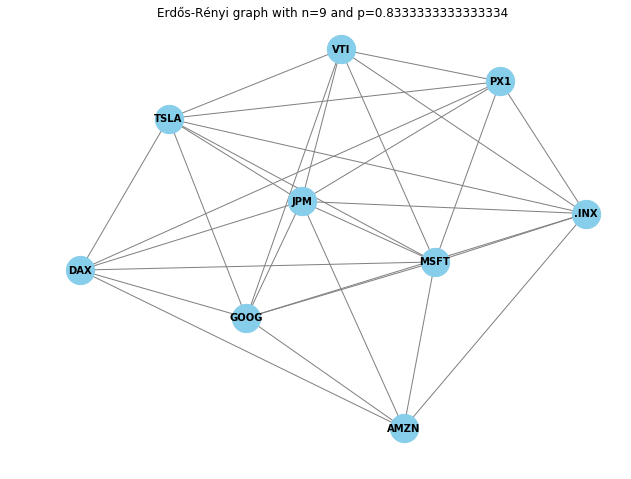

In [35]:
# Construction of the ER graph
# Parameters for the ER graph
n = len(correlation_matrix.columns)  # Number of nodes
p = estimate_p  # Probability of adding an edge

# Generate the ER graph
G = nx.erdos_renyi_graph(n, p)
node_names = ['GOOG', 'TSLA', 'PX1', 'MSFT', 'DAX', '.INX', 'AMZN', 'JPM', 'VTI']
mapping = {i: node_names[i] for i in range(n)}  # Mapping node indices to asset names

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, labels=mapping, node_size=800, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title(f"Erdős-Rényi graph with n={n} and p={p}")
plt.show()



**Characteristics of the ER Graph**

In [37]:
num_nodes = G.number_of_nodes()  # Number of nodes in the graph
num_edges = G.number_of_edges()  # Number of edges in the graph

# 2. Average degree
avg_degree = sum(dict(G.degree()).values()) / num_nodes  # The average degree of the graph

# 3. Average clustering coefficient
avg_clustering = nx.average_clustering(G)  # The average clustering coefficient of the graph

# 4. Average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(G)  # The average shortest path length between all pairs of nodes

# 5. Degree distribution exponent (Power-law approximation)
degree_sequence = [G.degree(n) for n in G.nodes()]  # Get the degree of each node
hist, bin_edges = np.histogram(degree_sequence, bins=range(max(degree_sequence) + 2), density=True)  # Compute the histogram
deg = (bin_edges[:-1] + bin_edges[1:]) / 2  # The degree bins (midpoints of histogram)
log_deg = np.log(deg[deg > 0])  # Logarithm of the degree bins
log_hist = np.log(hist[deg > 0])  # Logarithm of the degree distribution

# 6. Giant component (if it exists)
largest_component = max(nx.connected_components(G), key=len)  # Get the largest connected component
G_largest = G.subgraph(largest_component)  # Subgraph of the largest component
size_of_largest_component = len(largest_component)  # Size of the largest component

# 7. Connectivity (Graph connectedness)
is_connected = nx.is_connected(G)  # Check if the graph is connected

# Display the results
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Average clustering coefficient: {avg_clustering:.2f}")
print(f"Average shortest path length: {avg_shortest_path_length:.2f}")
print(f"Size of the largest component: {size_of_largest_component}")
print(f"Is the graph connected? {is_connected}")


Number of nodes: 9
Number of edges: 30
Average degree: 6.67
Average clustering coefficient: 0.84
Average shortest path length: 1.17
Size of the largest component: 9
Is the graph connected? True


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


**Comparison with Possible Models:**

- BA Model:
  Estimation of $m$ and $\gamma$

The gamma parameter is: -1.61
Average degree: 6.44
Estimated m: 3.22


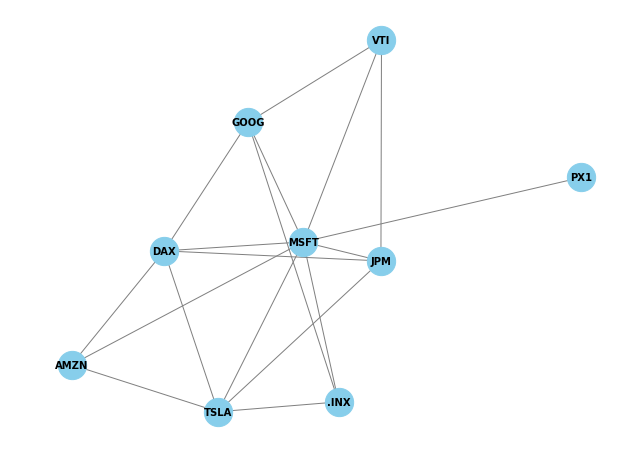

In [38]:
from collections import Counter
from scipy.stats import linregress

# Get degree dictionary of the graph
degree_dict = dict(G_reel.degree())

# 3. Count the frequency of each degree
degree_counts = Counter(degree_values)

# 4. Sort the degrees (key) and their frequencies (value)
sorted_degrees = sorted(degree_counts.items())

# 5. Extract sorted keys and values
degrees, frequencies = zip(*sorted_degrees)

# Apply logarithm transformation
log_degrees = np.log(np.array(degrees))
log_frequencies = np.log(np.array(frequencies))

# 7. Linear regression to determine a and log(c)
slope, intercept, _, _, _ = linregress(log_degrees, log_frequencies)

# 8. Calculate a and c
gamma = -slope
c = np.exp(intercept)

# Display results
print(f"The gamma parameter is: {gamma:.2f}")

# Calculate average degree
avg_degree = sum(degree_dict.values()) / 9
print(f"Average degree: {avg_degree:.2f}")

# Estimate m (number of edges attached to each new node)
m_estimate = avg_degree / 2
print(f"Estimated m: {m_estimate:.2f}")

# Total number of nodes
n = 9  
# Number of edges attached to each new node
m = int(m_estimate)

# Generate a Barabási-Albert graph
G = nx.barabasi_albert_graph(n, m)

# Map node indices to their respective stock names
node_names = ['GOOG', 'TSLA', 'PX1', 'MSFT', 'DAX', '.INX', 'AMZN', 'JPM', 'VTI']
mapping = {i: node_names[i] for i in range(n)}

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, labels=mapping, node_size=800, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.show()


**Characteristics of the BA Graph**

In [39]:
# BA model parameters

# 1. Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# 2. Average degree
avg_degree = sum(dict(G.degree()).values()) / num_nodes

# 3. Average clustering coefficient
avg_clustering = nx.average_clustering(G)

# 4. Average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(G)

# 5. Exponent of the degree distribution (Power-law approximation)
degree_sequence = [G.degree(n) for n in G.nodes()]
hist, bin_edges = np.histogram(degree_sequence, bins=range(max(degree_sequence)+2), density=True)
deg = (bin_edges[:-1] + bin_edges[1:]) / 2
log_deg = np.log(deg[deg > 0])
log_hist = np.log(hist[deg > 0])

# 6. Giant component (if it exists)
largest_component = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_component)
size_of_largest_component = len(largest_component)

# 7. Connectivity (Graph connectedness)
is_connected = nx.is_connected(G)

# Displaying the results
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Average clustering coefficient: {avg_clustering:.2f}")
print(f"Average shortest path length: {avg_shortest_path_length:.2f}")
print(f"Size of the largest component: {size_of_largest_component}")
print(f"Is the graph connected? {is_connected}")


Number of nodes: 9
Number of edges: 18
Average degree: 4.00
Average clustering coefficient: 0.56
Average shortest path length: 1.50
Size of the largest component: 9
Is the graph connected? True


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


# III.**Contagion** report section : pages 16 - 19

**Simulation of Contagion in an ER Network**

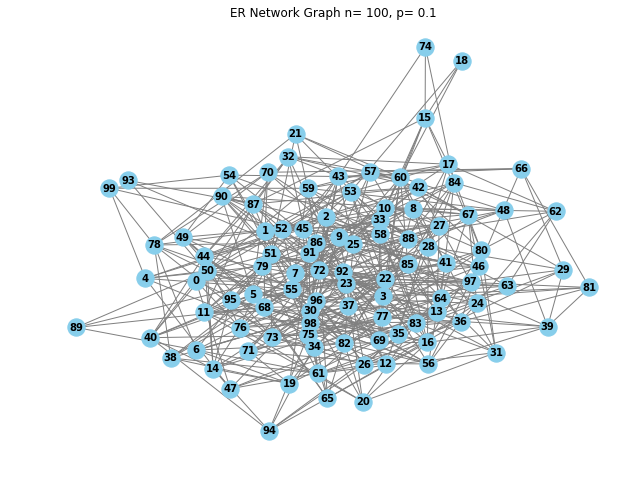

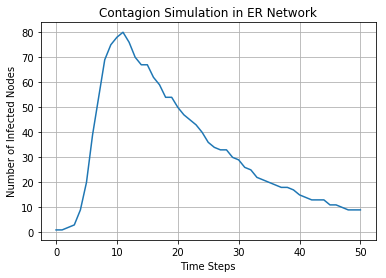

In [40]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# ER network parameters
n = 100  # Number of nodes
p = 0.1  # Probability of an edge between two nodes
G = nx.erdos_renyi_graph(n, p)

# Contagion parameters
infection_rate = 0.1  # Transmission probability
recovery_rate = 0.05  # Recovery rate

# Initializing node states: 0 for susceptible, 1 for infected, 2 for recovered
state = np.zeros(n)
initial_infected = [0]  # The first node is infected
state[initial_infected] = 1

# Infection propagation simulation
time_steps = 50
infected_history = [len(np.where(state == 1)[0])]

for t in range(time_steps):
    new_state = state.copy()
    for node in range(n):
        if state[node] == 1:  # If the node is infected
            # Attempt to spread to its neighbors
            for neighbor in G.neighbors(node):
                if state[neighbor] == 0 and np.random.rand() < infection_rate:
                    new_state[neighbor] = 1
            # Recovery
            if np.random.rand() < recovery_rate:
                new_state[node] = 2
    state = new_state
    infected_history.append(len(np.where(state == 1)[0]))

# Visualizing the evolution of the contagion
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title(f"ER Network Graph n= {n}, p= {p}")
plt.show()
plt.plot(infected_history)
plt.xlabel("Time Steps")
plt.ylabel("Number of Infected Nodes")
plt.title("Contagion Simulation in ER Network")
plt.grid(True)
plt.show()


**Simulation of Contagion in an BA Network**

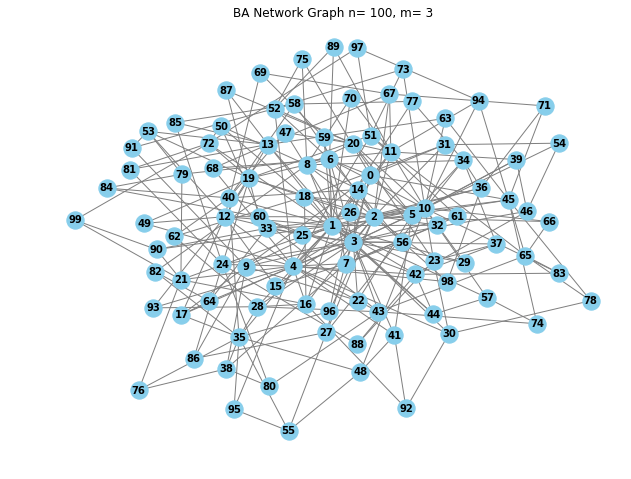

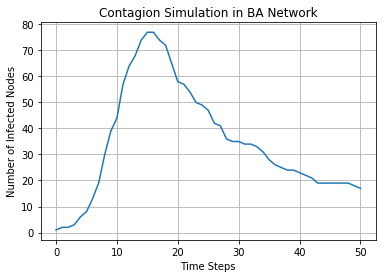

In [41]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# BA network parameters
n = 100  # Number of nodes
m = 3    # Number of edges to attach to a new existing node

# Creating the BA network
G = nx.barabasi_albert_graph(n, m)

# Contagion parameters
infection_rate = 0.1  # Transmission probability
recovery_rate = 0.05  # Recovery rate

# Initializing node states: 0 for susceptible, 1 for infected, 2 for recovered
state = np.zeros(n)
initial_infected = [0]  # The first node is infected
state[initial_infected] = 1

# Infection propagation simulation
time_steps = 50
infected_history = [len(np.where(state == 1)[0])]

for t in range(time_steps):
    new_state = state.copy()
    for node in range(n):
        if state[node] == 1:  # If the node is infected
            # Attempt to spread to its neighbors
            for neighbor in G.neighbors(node):
                if state[neighbor] == 0 and np.random.rand() < infection_rate:
                    new_state[neighbor] = 1
            # Recovery
            if np.random.rand() < recovery_rate:
                new_state[node] = 2
    state = new_state
    infected_history.append(len(np.where(state == 1)[0]))

# Visualizing the evolution of the contagion
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title(f"BA Network Graph n= {n}, m= {m}")
plt.show()
plt.plot(infected_history)
plt.xlabel("Time Steps")
plt.ylabel("Number of Infected Nodes")
plt.grid(True)
plt.title("Contagion Simulation in BA Network")
plt.show()


**Simulation of Contagion in an WS Network**

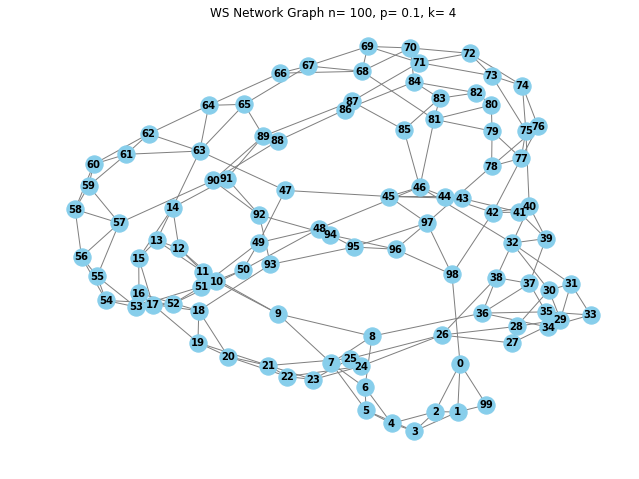

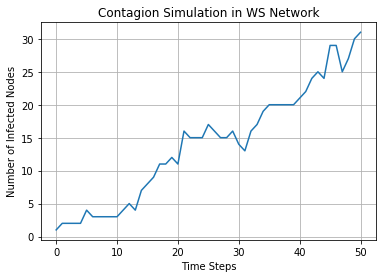

In [42]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# WS network parameters
n = 100  # Number of nodes
k = 4    # Initial degree (each node is connected to its k nearest neighbors)
p = 0.1  # Probability of edge rewiring

# Creating the WS network
G = nx.watts_strogatz_graph(n, k, p)

# Contagion parameters
infection_rate = 0.1  # Transmission probability
recovery_rate = 0.05  # Recovery rate

# Initializing node states: 0 for susceptible, 1 for infected, 2 for recovered
state = np.zeros(n)
initial_infected = [0]  # The first node is infected
state[initial_infected] = 1

# Infection propagation simulation
time_steps = 50
infected_history = [len(np.where(state == 1)[0])]

for t in range(time_steps):
    new_state = state.copy()
    for node in range(n):
        if state[node] == 1:  # If the node is infected
            # Attempt to spread to its neighbors
            for neighbor in G.neighbors(node):
                if state[neighbor] == 0 and np.random.rand() < infection_rate:
                    new_state[neighbor] = 1
            # Recovery
            if np.random.rand() < recovery_rate:
                new_state[node] = 2
    state = new_state
    infected_history.append(len(np.where(state == 1)[0]))

# Visualizing the evolution of the contagion
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title(f"WS Network Graph n= {n}, p= {p}, k= {k}")
plt.show()
plt.plot(infected_history)
plt.xlabel("Time Steps")
plt.ylabel("Number of Infected Nodes")
plt.grid(True)
plt.title("Contagion Simulation in WS Network")
plt.show()
